## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "Project Data/Mouse_metadata.csv"
study_results_path = "Project Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(f"There are {merge_df['Mouse ID'].count()} total mice entries in the dataset.")

There are 1893 total mice entries in the dataset.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = merge_df.loc[merge_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = 'last')]
print(f"{duplicate_df['Mouse ID'].values[0]} is the duplicated mouse ID.")
duplicate_df

g989 is the duplicated mouse ID.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = 'first')
print(f"Dropped {merge_df['Mouse ID'].count() - clean_df['Mouse ID'].count()} duplicated mouse ID and timepoint pairs.")
clean_df

Dropped 5 duplicated mouse ID and timepoint pairs.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
print(f"There are now {clean_df['Mouse ID'].count()} (previously {merge_df['Mouse ID'].count()}) total entries in the dataset.")

There are now 1888 (previously 1893) total entries in the dataset.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean')
tumor_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median')
tumor_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Variance')
tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Standard Deviation')
tumor_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('SEM')

tumor_df = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis = 1)
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Dictionary for renaming the columns
column_dict = {
    'mean' : 'Mean',
    'median' : 'Median',
    'var' : 'Variance',
    'std' : 'Standard Deviation',
    'sem' : 'SEM'
}
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns = column_dict)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
#Plot data
timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count()

<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

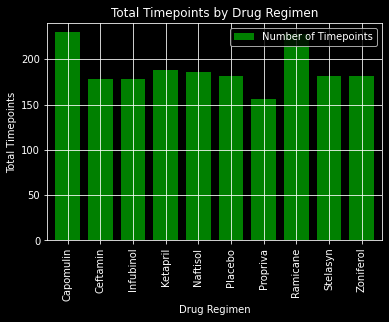

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts.plot(kind = 'bar',
                color = 'green',
                grid = True,
                width = 0.75,
                label = 'Number of Timepoints',
                title = 'Total Timepoints by Drug Regimen',
                use_index = True,
                xlabel = 'Drug Regimen',
                ylabel = 'Total Timepoints',
                legend = 9,
                xlim = (0, len(timepoint_counts)),
                ylim = (0, max(timepoint_counts) + 10)
             )
#question for self: how do i change alpha values of grid within a pd.method? how do i chagne the rotation of x ticks?

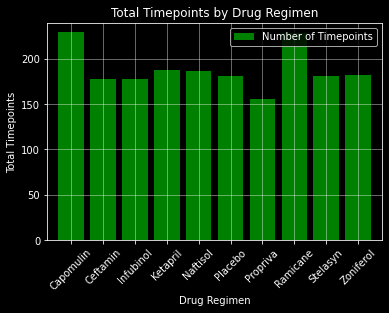

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Creating all variables needed to plot
x_axis = [x for x in range(len(tumor_df.index))]
x_labels = tumor_df.index.tolist()

#Setting up graph features
plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xlim(-.75, len(timepoint_counts) - .25),
plt.ylim(0, max(timepoint_counts) + 10)
plt.xticks(x_axis, x_labels, rotation = 45)
plt.grid(alpha=.5)

#Plotting
plt.bar(x_axis, timepoint_counts, color = 'green', label = 'Number of Timepoints')
plt.legend(loc = 1)
plt.show()

#plt.plot better, seems like more control over graph

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Plot data
pie_df = pd.DataFrame({'Percent' : clean_df.groupby('Sex')['Mouse ID'].count() / clean_df.groupby('Sex')['Mouse ID'].count().sum()})
pie_list = pie_df['Percent'].values.tolist()
pie_index = pie_df['Percent'].index.tolist()
pie_series = pie_df['Percent']
pie_series

Sex
Female    0.492585
Male      0.507415
Name: Percent, dtype: float64

<AxesSubplot:title={'center':'Gender Percent Distribution of Tested Mice'}>

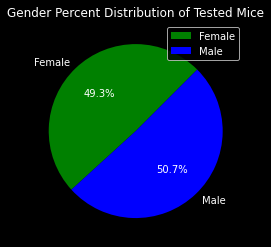

In [12]:
# Generate a pie plot Pandas
pie_series.plot(kind = 'pie',
                title = "Gender Percent Distribution of Tested Mice",
                legend = [pie_index],
                colors = ['green', 'blue'],
                startangle = 45,
                autopct = '%1.1f%%',
                ylabel = ''
               )

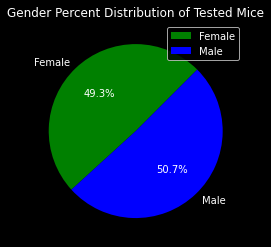

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Graph Features
plt.title('Gender Percent Distribution of Tested Mice')

#Plotting
plt.pie(pie_list, labels = pie_index, colors = ['green', 'blue'], autopct = '%1.1f%%', startangle = 45)
plt.legend(pie_index, loc = 0)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [15]:
#Real start is to filter down to relevant data
filtered_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') | 
                           (clean_df['Drug Regimen'] == 'Ramicane') | 
                           (clean_df['Drug Regimen'] == 'Infubinol') | 
                           (clean_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
max_time_series = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_merged_df = filtered_df.merge(max_time_series, on = 'Mouse ID').rename(columns = {'Timepoint_x' : 'Timepoint', 'Timepoint_y' : 'Max Timepoint'})

#Filtering out non-max timepoint values, then filter to relevant columns
time_filtered_df = time_merged_df.loc[time_merged_df['Timepoint'] == time_merged_df['Max Timepoint']].loc[:,['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']].sort_values('Drug Regimen')

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = time_filtered_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []

#Populating that empty list with list of drug values
#creates variables... capomulin_list, ceftamin_list, infubinol_list, ramicane_list and then appends each to the empty list
for treatment in treatment_labels:
    locals()[f"{treatment.lower()}_list"] = time_filtered_df.loc[(time_filtered_df['Drug Regimen'] == treatment)]['Tumor Volume (mm3)']
    treatment_values.append(locals()[f"{treatment.lower()}_list"])

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_labels:
    temp_quartiles = locals()[f"{treatment.lower()}_list"].quantile([.25, .5, .75]).tolist()
    temp_iqr = round((temp_quartiles[2] - temp_quartiles[0]),2)
    temp_upr_bound = round(temp_quartiles[2] + (1.5 * temp_iqr),2)
    temp_lwr_bound = round(temp_quartiles[0] - (1.5 * temp_iqr),2)
    # Determine outliers using upper and lower bounds
    temp_outliers = [x for x in locals()[f"{treatment.lower()}_list"].tolist() if ((x > temp_upr_bound) | (x < temp_lwr_bound))]
    print(f"Outlier range for {treatment}: >{temp_upr_bound} or <{temp_lwr_bound} with an IQR {temp_iqr}")
    if len(temp_outliers) == 0:
        print(f"There are no outliers for {treatment}.")
    else:
        print(f"There is/are {len(temp_outliers)} outlier(s) for {treatment}: {temp_outliers}.")
    temp_outliers = []
    print("----")

Outlier range for Capomulin: >51.83 or <20.71 with an IQR 7.78
There are no outliers for Capomulin.
----
Outlier range for Ceftamin: >87.67 or <25.35 with an IQR 15.58
There are no outliers for Ceftamin.
----
Outlier range for Infubinol: >82.75 or <36.83 with an IQR 11.48
There is/are 1 outlier(s) for Infubinol: [36.3213458].
----
Outlier range for Ramicane: >54.31 or <17.91 with an IQR 9.1
There are no outliers for Ramicane.
----


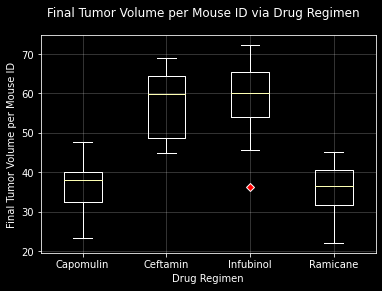

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Set up for plots
fig, ax = plt.subplots()
fig.suptitle("Final Tumor Volume per Mouse ID via Drug Regimen")
ax.set_ylabel("Final Tumor Volume per Mouse ID")
ax.set_xlabel("Drug Regimen")
plt.grid(alpha = .25)
outlier_style = dict(markerfacecolor = 'red', marker = 'D')

#Plotting all the boxplots
ax.boxplot(treatment_values, labels = treatment_labels, flierprops = outlier_style)
plt.show()

#QUESITON FOR SELF: how do you shift the xlabel "drug regimen" so its centered on the figure??
# -------------> returns error ------> ax.set_xticklabels(ax.get_xticklabels(), treatment_labels) why??

## Line and Scatter Plots

The valid mouse IDs are: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
Which mouse ID?l509
Mouse l509 is a great choice!


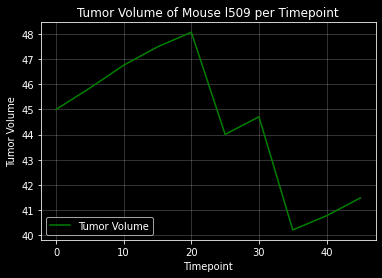

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#recreating a relevant dataframe
capomulin_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')]

#getting input value of mouse
print(f"The valid mouse IDs are: {capomulin_df['Mouse ID'].unique()}")
test_input = input("Which mouse ID?")
if (test_input in capomulin_df['Mouse ID'].unique()):
    user_input = test_input
    print(f"Mouse {user_input} is a great choice!")
else:
    raise ValueError("That is not a valid mouse ID.")

#filtering to just relevant data for user input
relevant_capomulin_df = capomulin_df.loc[capomulin_df['Mouse ID'] == user_input][['Timepoint', 'Tumor Volume (mm3)']]

#getting axis values
capomulin_timepts = relevant_capomulin_df['Timepoint'].values.tolist()
capomulin_size = relevant_capomulin_df['Tumor Volume (mm3)'].values.tolist()

#setting up graph
plt.title(f"Tumor Volume of Mouse {user_input} per Timepoint")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.grid(alpha=.25)
label_tag = 'Tumor Volume'

#plotting graph
plt.plot(capomulin_timepts, capomulin_size, color = 'green', label = label_tag)
plt.legend(loc = 3)

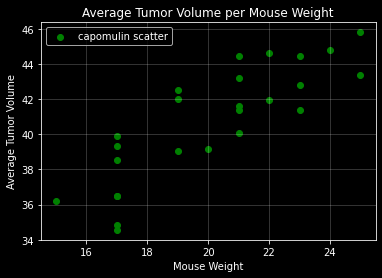

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#pulling values
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

#setting up graph
plt.title(f"Average Tumor Volume per Mouse Weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.grid(alpha=.25)

#graphing
plt.scatter(mouse_weight, avg_tumor_vol, facecolor = 'green', label = 'capomulin scatter')
plt.legend(loc = 0)

## Correlation and Regression

r = 0.84, which is a strong correlation.


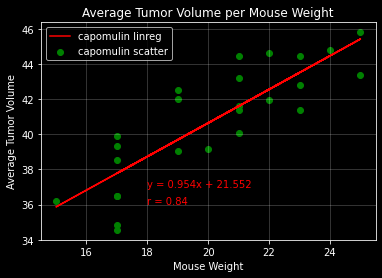

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
corr_coef = round(sts.pearsonr(mouse_weight, avg_tumor_vol)[0],2)
print(f"r = {corr_coef}, which is a strong correlation.")

#calculating linear regression model
reg_arr = sts.linregress(mouse_weight, avg_tumor_vol)
#creating linear regression line
linreg_y_values = reg_arr[0] * mouse_weight + reg_arr[1]
#creating linear regression label
linreg_label = f"y = {round(reg_arr[0],3)}x + {round(reg_arr[1],3)}"

#setting up graph
plt.title(f"Average Tumor Volume per Mouse Weight")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.grid(alpha=.25)

#graphing scatter and linreg
plt.scatter(mouse_weight, avg_tumor_vol, facecolor = 'green', label = 'capomulin scatter')
plt.plot(mouse_weight, linreg_y_values, color = 'red', label = 'capomulin linreg')
plt.annotate(linreg_label, (18, 37), color = 'red')
plt.annotate(f"r = {corr_coef}", (18, 36), color = 'red')
plt.legend(loc = 0)

## Observations and Insight
Unforunately, the data we received and the graphs we were tasked to produce are not as insightful as they can be.

1. Fault of the data collection/mouse testing: the drug Propriva had the least number of observed test trials per timepoint--even less than the placebo. All drug administrations should be equally tracked to minimize confounding variables.

2. The mice tested in the data do not have similar weights to begin with, which has huge implications on our boxplot tests. From the scatterplot, the strong correlation between mouse weight and tumor volume (0.84) would suggest that heavier mice will have larger final tumor volumes than lighter mice. Our boxplot test is comparing the absolute values of the final tumor growths, when a more accurate test would account for starting weights. 

This adjustment can be accomplished one of two ways:

a) a second-layer group-by on the weights (or even bins of weights), proceed normally with plotting

b) instead of measuring the final weight directly, can track the difference in weights post-treatment

3. As mentioned above, the boxplot test is not that useful. We cannot determine which drug is more effective by just comparing the boxplot + whiskers because we do not know how much of that absolute tumor reduction is determined from the drug or from the starting weight (eg. lighter mice will have lower tumor volumes, but not necessarily because of the drug they took). Similarly, the standard deviation (whisker range) does not demonstrate how consistent a drug's effects are, due to the varied starting weights.